In [1]:
import torch
import os, sys
import numpy as np
parent_dir = os.path.abspath('../')
if parent_dir not in sys.path:
    sys.path.append(parent_dir)
os.environ['CUDA_VISIBLE_DEVICES']='3'

tensor(-1.9420e-05)


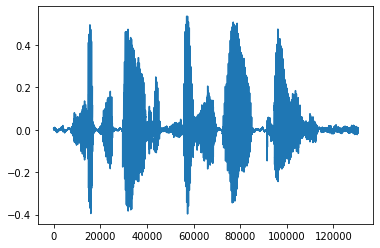

In [2]:
import torchaudio
import matplotlib.pyplot as plt
import torch
import torchaudio.functional as aF
audio_path = '/root/VCTK-Corpus/wav48/p227/p227_003.wav'
audio, fs = torchaudio.load(audio_path)
K = 50000
audio_seg = audio[...,K:130560+K].squeeze().type(torch.FloatTensor)
print(audio_seg.mean())
plt.plot(audio_seg)
plt.show()

torch.Size([256, 512])


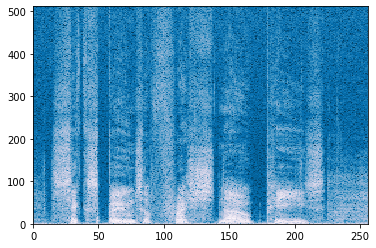

In [3]:
from models.mdct import MDCT4,IMDCT4
from util.util import kbdwin
mdct4 = MDCT4(n_fft=1024, hop_length=512, win_length=1024, window=kbdwin, center=True, device='cuda')
imdct4 = IMDCT4(n_fft=1024, hop_length=512, win_length=1024, window=kbdwin, center=True, device='cuda')
audio_seg.requires_grad_()
spectro = mdct4(audio_seg.cuda())
print(spectro.size())
spectro_ = aF.amplitude_to_DB((spectro.detach().permute(1,0).abs() + 1e-4),20,1e-4,1).squeeze(0)
plt.pcolormesh(spectro_.detach().cpu().numpy(), cmap='PuBu_r')
plt.show()

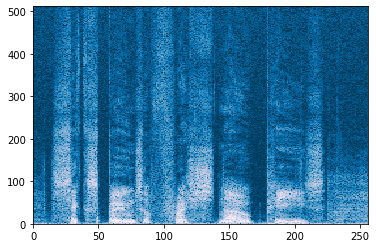

In [4]:
G = 400
log_spectro = torch.log10(G*spectro+torch.sqrt((G*spectro)**2+1))
plt.pcolormesh(log_spectro.abs().detach().permute(1,0).cpu().numpy(), cmap='PuBu_r')
plt.show()

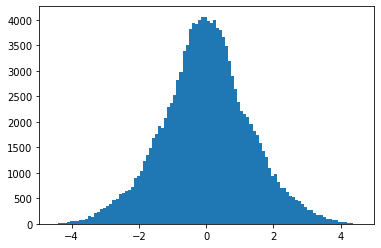

In [5]:
sp_hist_fig, sp_hist_ax = plt.subplots()
sp_hist_ax.hist(log_spectro.detach().permute(1,0).cpu().numpy().reshape(-1,1),bins=100)
plt.show()

tensor(1.0977e-17, dtype=torch.float64, grad_fn=<MeanBackward0>)


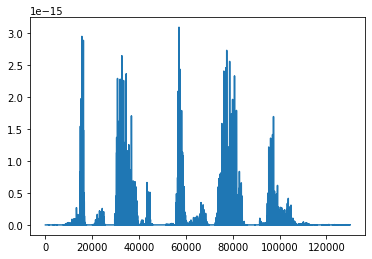

In [6]:
_spectro = (10**(log_spectro)-10**(-log_spectro))/(2*G)
reconstruction = imdct4(_spectro.unsqueeze(0))
err = (audio_seg.cpu().squeeze()[:130000] - reconstruction.squeeze().cpu()[:130000])**2
print(err.mean())
plt.plot(err.detach())
plt.show()

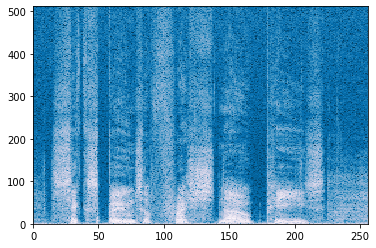

In [7]:
spectro_ = aF.amplitude_to_DB((_spectro.detach().permute(1,0).abs() + 1e-4),20,1e-4,1).squeeze(0)
plt.pcolormesh(spectro_.detach().cpu().numpy(), cmap='PuBu_r')
plt.show()